In [2]:
# mounting the drive to read the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

In [4]:
!pip install pydot
!pip install graphviz

In [5]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s et

In [6]:
import gradio as gr

In [7]:
# reading the data from local google drive
with open('/content/drive/MyDrive/Colab_Notebooks/directory/Txt_the_enemy_3.txt') as story:
  story_data = story.read()

In [8]:

print(story_data)

Dr. Sadao Hoki's house was built on a spot off the Japanese coast. As a little boy he had often played there. His low

square stone house was built above the narrowbeach. His father had taken him often to the islands not far from the

shore. He would say to the serious little boy at his side.

"Those islands out there are the stepping-stones to the future of Japan."

"Where shall we step from them?" Sadao had asked.

"Who knows?" his father had answered. "Who can limit our future? It depends on what we make it."

Sadao had paid attention to this as he did everything his father said. His father never joked or played with him. However,

he gave all his attention to his only son. Sadao knew that his education" was the most important thing in the world to his

father. For this reason he had been sent at twenty-two to America to learn all that could be learned of surgery and

medicine. He had come back at thirty. Before his father died, he had seen Sadao become famous not only as a surgeon


In [9]:
# data cleaning process
import re                                # Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [10]:
# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)

final = ''                                # initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

print(final)

final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

["dr. sadao hoki's house was built on a spot off the japanese coast. as a little boy he had often played there. his low", '', 'square stone house was built above the narrowbeach. his father had taken him often to the islands not far from the', '', 'shore. he would say to the serious little boy at his side.', '', '"those islands out there are the stepping-stones to the future of japan."', '', '"where shall we step from them?" sadao had asked.', '', '"who knows?" his father had answered. "who can limit our future? it depends on what we make it."', '', 'sadao had paid attention to this as he did everything his father said. his father never joked or played with him. however,', '', 'he gave all his attention to his only son. sadao knew that his education" was the most important thing in the world to his', '', 'father. for this reason he had been sent at twenty-two to america to learn all that could be learned of surgery and', '', 'medicine. he had come back at thirty. before his father died

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Instantiating the Tokenizer
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

580
{'the': 1, 'he': 2, 'to': 3, 'his': 4, 'she': 5, 'was': 6, 'had': 7, 'and': 8, 'a': 9, 'sadao': 10, 'him': 11, 'man': 12, 'hana': 13, 'said': 14, 'not': 15, 'of': 16, 'that': 17, 'in': 18, 'is': 19, 'it': 20, 'with': 21, 'but': 22, 'we': 23, 'her': 24, 'on': 25, 'at': 26, 'been': 27, 'yumi': 28, 'there': 29, 'be': 30, 'they': 31, 'will': 32, 'i': 33, 'this': 34, 'you': 35, 'what': 36, 'white': 37, 'as': 38, 'father': 39, 'would': 40, 'for': 41, 'now': 42, 'if': 43, 'back': 44, 'then': 45, 'out': 46, 'them': 47, 'put': 48, 'have': 49, 'do': 50, 'over': 51, 'must': 52, 'did': 53, 'an': 54, 'so': 55, 'old': 56, 'saw': 57, 'face': 58, 'house': 59, 'from': 60, 'sea': 61, 'die': 62, 'into': 63, 'tell': 64, 'side': 65, 'are': 66, 'can': 67, 'or': 68, 'only': 69, 'thing': 70, 'come': 71, 'something': 72, 'were': 73, 'again': 74, 'washed': 75, 'yes': 76, 'enemy': 77, 'went': 78, 'master': 79, 'asked': 80, 'never': 81, 'all': 82, 'america': 83, 'could': 84, 'few': 85, 'came': 86, 'nothing': 

In [12]:
# We will turn the sentences to sequences line by line and create n_gram sequences

input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[243, 10], [243, 10, 244], [243, 10, 244, 59], [243, 10, 244, 59, 6], [243, 10, 244, 59, 6, 154], [243, 10, 244, 59, 6, 154, 25], [243, 10, 244, 59, 6, 154, 25, 9], [243, 10, 244, 59, 6, 154, 25, 9, 245], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9, 155], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9, 155, 106], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9, 155, 106, 2], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9, 155, 106, 2, 7], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9, 155, 106, 2, 7, 107], [243, 10, 244, 59, 6, 154, 25, 9, 245, 246, 1, 105, 247, 38, 9, 155, 106,

In [13]:
# Taking xs and labels to train the model.

xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have
# a single +ve value(i.e 1) for that label and other values will be zero.

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)


xs:  [[  0   0   0 ...   0   0 243]
 [  0   0   0 ...   0 243  10]
 [  0   0   0 ... 243  10 244]
 ...
 [  0   0   0 ...   2   7 578]
 [  0   0   0 ...   7 578   4]
 [  0   0   0 ... 578   4 579]]
labels: [ 10 244  59 ...   4 579 580]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [14]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# using the keras to define the model

i = Input(shape=(max_seq_length - 1, ))                           # using 1 less value becasuse we are preserving the last value for predicted word
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)


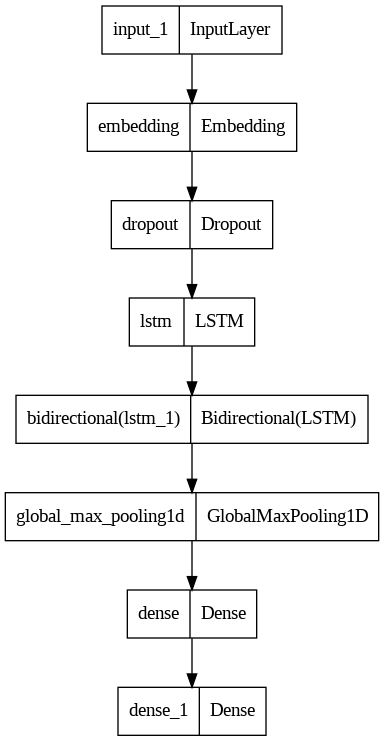

In [15]:

from keras.utils import plot_model
import pydot, graphviz

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 5.8660 - accuracy: 0.0439
Epoch 1: loss improved from inf to 5.86601, saving model to next_words.h5
60/60 [==============================] - 70s 886ms/step - loss: 5.8660 - accuracy: 0.0439
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - ETA: 0s - loss: 5.5608 - accuracy: 0.0543
Epoch 2: loss improved from 5.86601 to 5.56075, saving model to next_words.h5
60/60 [==============================] - 49s 817ms/step - loss: 5.5608 - accuracy: 0.0543
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 5.5299 - accuracy: 0.0543
Epoch 3: loss improved from 5.56075 to 5.52989, saving model to next_words.h5
60/60 [==============================] - 49s 824ms/step - loss: 5.5299 - accuracy: 0.0543
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 5.5174 - accuracy: 0.0543
Epoch 4: loss improved from 5.52989 to 5.51745, saving model to next_words.h5
60/60 [==============================] - 48s 810ms/step - loss: 5.5174 - accuracy: 0.0543
Epoch 5/50
60/60 [==============================] - ETA: 0s - loss: 5.4741 - accuracy: 0.0543
Epoch 5: loss improved from 5.51745 to 5.47409, saving model to next_words.h5
60/60 [==============================] - 49s 819ms/st

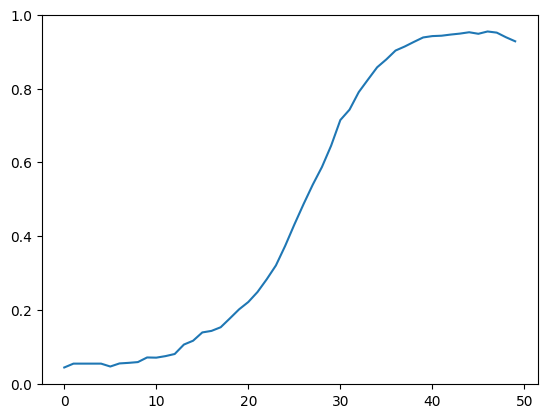

In [16]:
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


# We can know about the shape of the model
r = model.fit(xs,ys,epochs=50,callbacks=[checkpoint])


# Evaluating the model on accuracy
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [17]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  return seed

In [23]:
with gr.Blocks(title = "Text Generator") as screen:
  eg= [["the old gardener said to hana",5],["dr. sadao hoki's house was built on a spot off",10],["She then put the quilt",15]]
  heading = gr.Markdown("""# Text Generator
  ## Next Word Prediction using LSTM""")
  arg1 = gr.Textbox(label="Input Text",placeholder="Enter some text")
  arg2 = gr.Number(label="Number of Words to Predict")
  btn = gr.Button("Predict/Generate")
  output = gr.Textbox(label="Output")
  gr.Markdown("""### Some Random examples from the Text Corpus""")
  gr.Examples(examples=[["the old gardener said to hana",10],
                        ["dr. sadao hoki's house was built on a spot off",20],
                        ["She then put the quilt",5]],
              inputs=[arg1,arg2])
  btn.click(fn=predict_words,inputs=[arg1,arg2],outputs=output)

screen.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5b3618d5857f0d9499.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
